In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd
import plotly.express as px
import re

In [2]:
# read the dataset:
cdc_rf = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined/combined_cdc_r_v_u_df.csv', encoding = "UTF-8")

In [3]:
cdc_rf = cdc_rf.drop(columns=['Location','GeoLocation', 'GEOID','Rural_Pop_Percent', 'Urban_Housing_Percent', 'Rural_Housing_Percent'])

In [4]:
# Replace the column names
cdc_rf.columns = cdc_rf.columns.str.replace(' ', '_')
cdc_rf.columns = cdc_rf.columns.str.replace('(', '_')
cdc_rf.columns = cdc_rf.columns.str.replace(')', '_')
cdc_rf.columns = cdc_rf.columns.str.replace(',', '_')
cdc_rf.columns = cdc_rf.columns.str.replace('>=', 'GE')
cdc_rf.columns = cdc_rf.columns.str.replace('-', 'to')

In [5]:
cdc_rf_drop = cdc_rf.drop(['Coronary_heart_disease_among_adults_aged_GE18_years'], axis=1)




In [6]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cdc_rf_drop, cdc_rf['Coronary_heart_disease_among_adults_aged_GE18_years'], test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.028090379870129908


In [9]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.12511850649350645


In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9754236644752224


<Axes: >

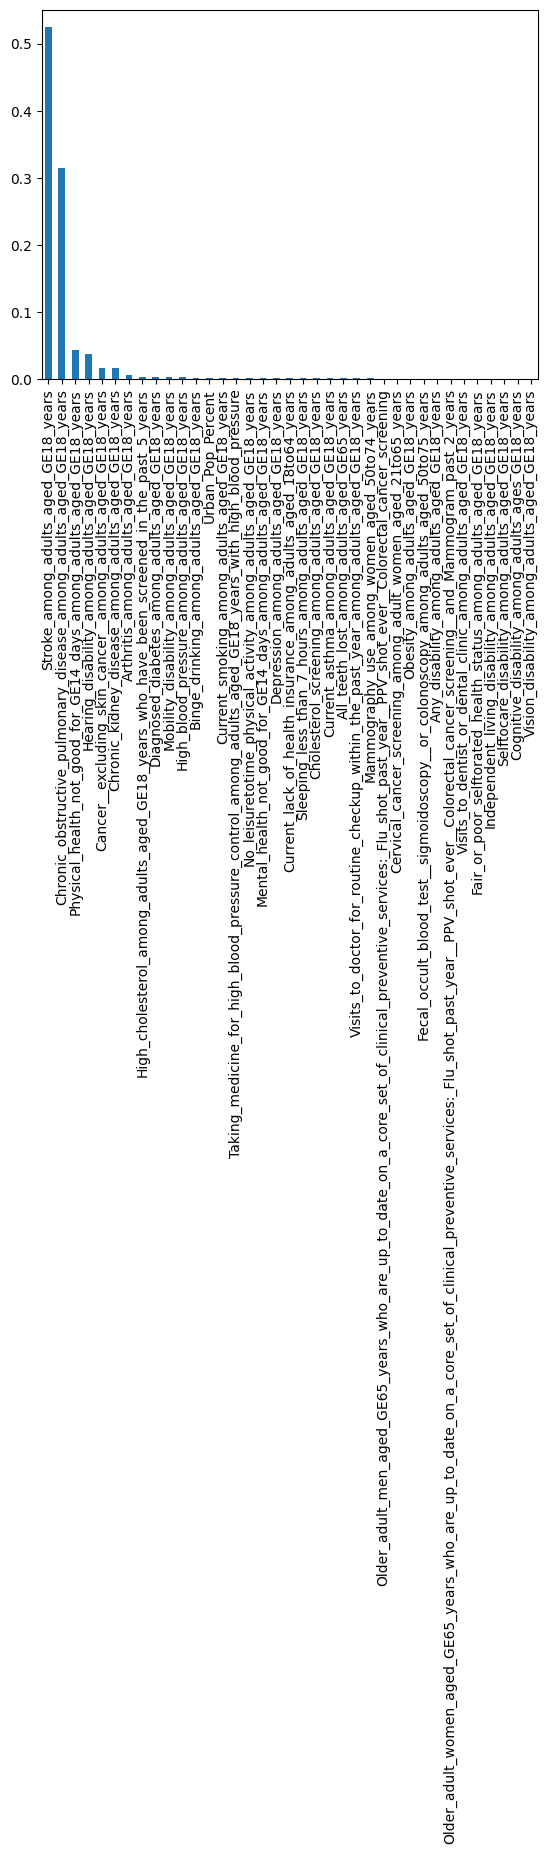

In [11]:
feature_importances = rf_regressor.feature_importances_
# Create a Series for easier plotting
importances = pd.Series(feature_importances, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar')


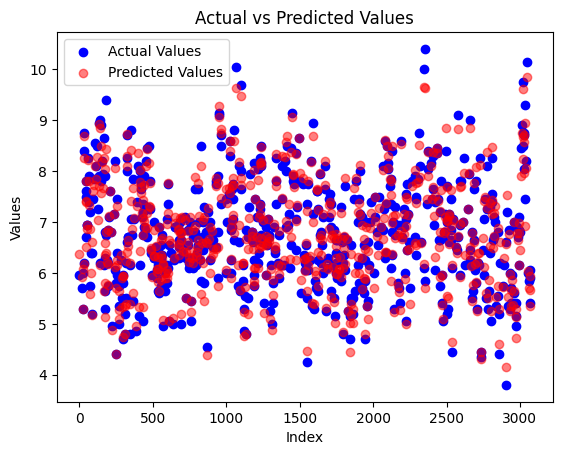

In [12]:
# Scatter plot for actual values
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

X = cdc_rf_drop
y = cdc_rf['Coronary_heart_disease_among_adults_aged_GE18_years']

# Perform cross-validation
scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
rf_regressor.fit(X, y)
# Convert scores to positive values (because 'neg_mean_squared_error' returns negative values)
mse_scores = -scores

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

# Get R-squared scores
rs_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='r2')
print("R-squared scores for each fold:", rs_scores)
print("Mean R-squared:", rs_scores.mean())


# Perform cross-validation

#scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')


# Convert scores to positive values (because 'neg_mean_squared_error' returns negative values)
#mse_scores = -scores

# Calculate RMSE for each fold
#rmse_scores = np.sqrt(mse_scores)
#print("RMSE scores for each fold:", rmse_scores)
#print("Mean RMSE:", rmse_scores.mean())
#print("Standard Deviation of RMSE:", rmse_scores.std())



# get rsquared scores
#rs_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='r2')
# rsquared: the higher the better
print("R-squared scores for each fold:", rs_scores)
print("Mean R-squared:", rs_scores.mean())

RMSE scores for each fold: [0.28699519 0.1854911  0.23991411 0.38530792 0.15633408 0.17701021
 0.29881204 0.23133914 0.20531962 0.38909078]
Mean RMSE: 0.2555614185575487
Standard Deviation of RMSE: 0.0786161202850279
R-squared scores for each fold: [0.95322025 0.96648428 0.88295439 0.89337327 0.97792043 0.960244
 0.91387879 0.9479508  0.96173857 0.91347801]
Mean R-squared: 0.9371242787723695
R-squared scores for each fold: [0.95322025 0.96648428 0.88295439 0.89337327 0.97792043 0.960244
 0.91387879 0.9479508  0.96173857 0.91347801]
Mean R-squared: 0.9371242787723695


In [14]:
print("Mean R-squared:", rs_scores.mean())


Mean R-squared: 0.9371242787723695


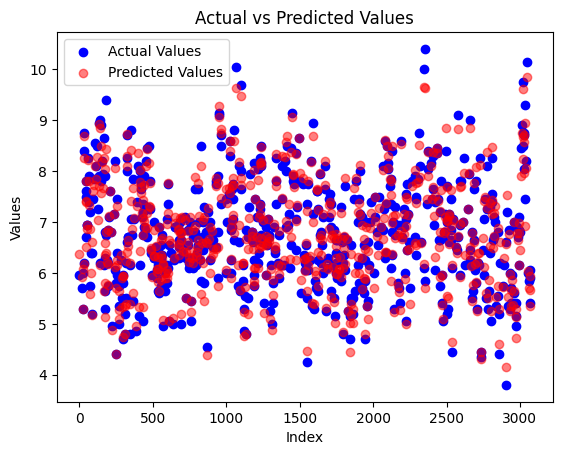

In [15]:
# Scatter plot for actual values
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

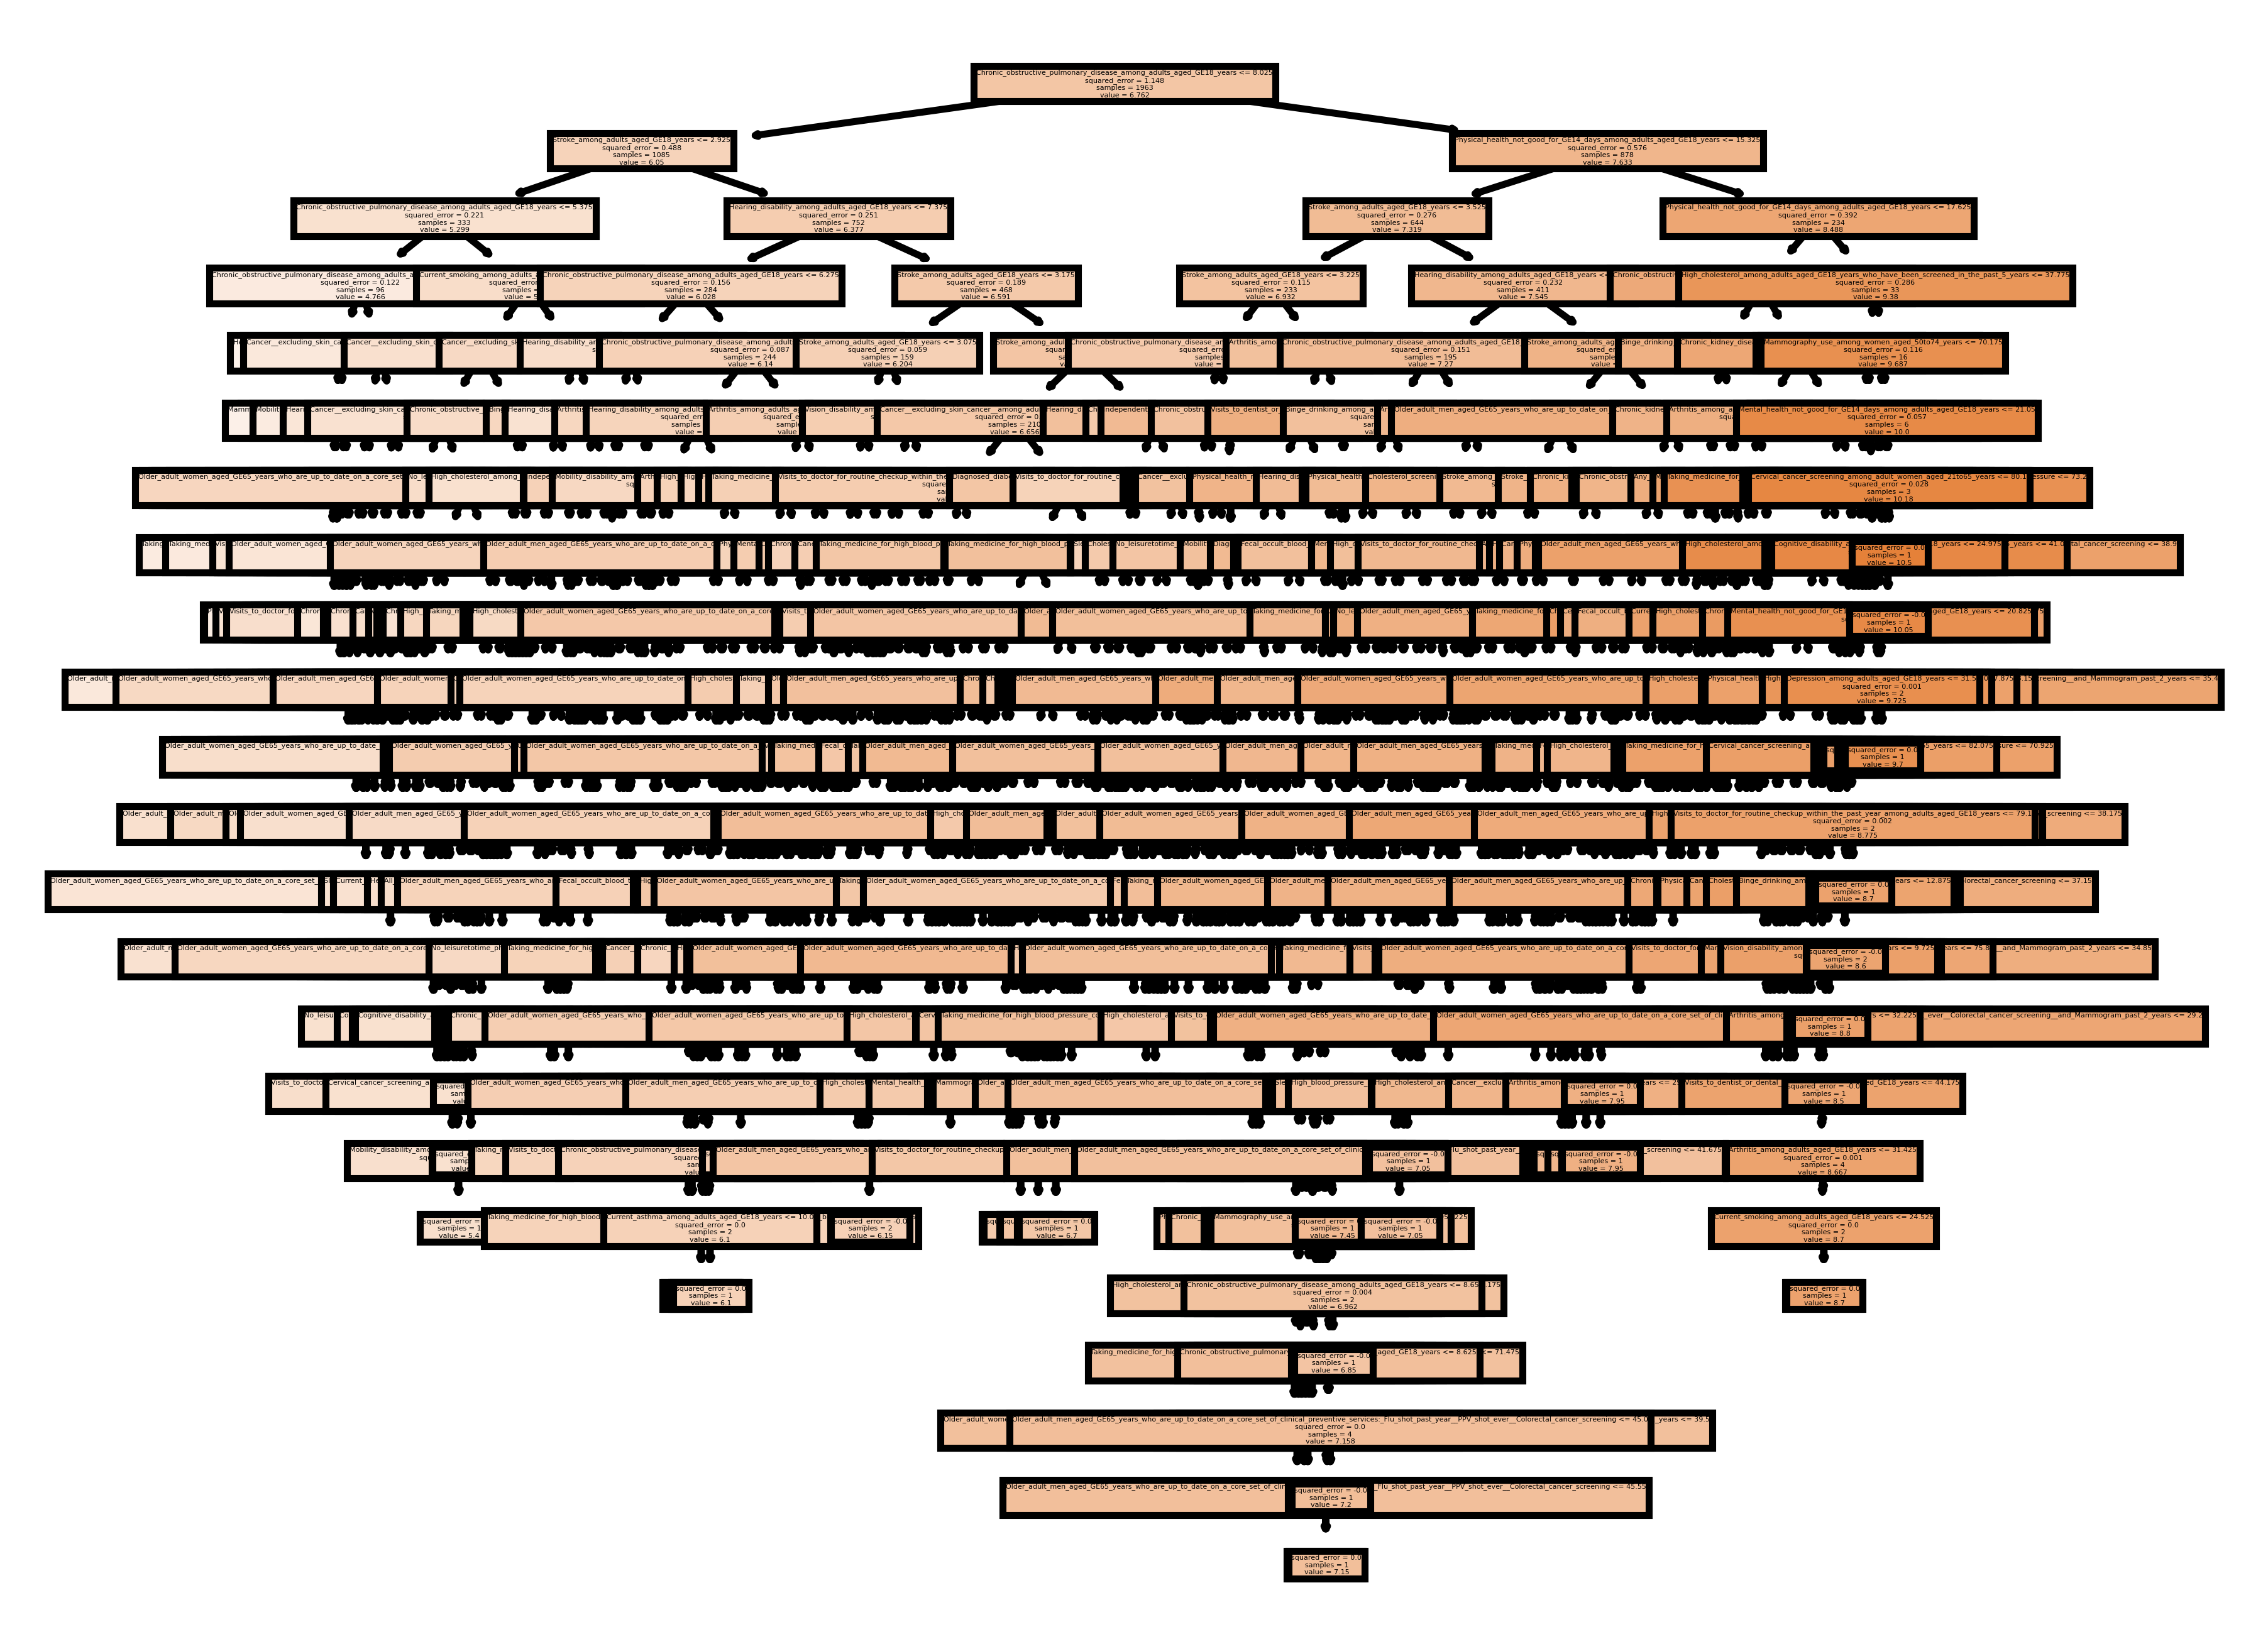

In [16]:
from sklearn import tree


fn=cdc_rf_drop.columns
cn='Coronary_heart_disease_among_adults_aged_GE18_years'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# plot a single tree
estimator_rf = rf_regressor.estimators_[0]
tree.plot_tree(estimator_rf , feature_names = fn, filled = True);
fig.savefig(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/outputfigures/rf_individualtree.png')

In [ ]:
# print out the dimention of the random forest
print(rf_regressor.n_estimators)

# print out max tree height
print(estimator_rf.tree_.max_depth)

# print out mean tree height
print(estimator_rf.tree_.node_count)

# print out the min tree height
print(estimator_rf.tree_.min_samples_leaf)

# print out the number of leaf nodes
print(estimator_rf.tree_.n_leaves)

#